## Loading the Data

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [80]:
df = pd.read_csv("flickr_data2.csv", delimiter=",",encoding="UTF-8")
df.head()

C:\Users\steph\AppData\Local\Temp\ipykernel_23960\1372696961.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flickr_data2.csv", delimiter=",",encoding="UTF-8")


id          user        lat      long  \
0  4395181099  30624617@N03  45.754858  4.821710   
1  4394748717  35853470@N00  45.753270  4.862953   
2  4394694699  11817998@N05  45.760655  4.846564   
3  4394803790  11545749@N06  45.784000  4.874072   
4  4394803554  11545749@N06  45.784000  4.874072   

                                                tags  \
0                 chair,lyon,rhône,chaise,rhônealpes   
1                                                NaN   
2                                         365,iphone   
3       nin,nineinchnails,gift,screening,toiou,avott   
4  lyon,nin,nineinchnails,gift,screening,toiou,avott   

                         title   date_taken_minute   date_taken_hour  \
0             Chaises avec vue                11.0                15   
1                          NaN                51.0                17   
2       59/365 - R46 V103 B163                29.0                17   
3  2010-01-29 Toiou Avott Lyon                15.0                20   
4  2010-01-28 Toiou Avott Lyon                10.0                20   

    date_taken_day   date_taken_month   date_taken_year  date_upload_minute  \
0               28                  2              2010                  23   
1               28                  2              2010                  52   
2               28                  2              2010                  33   
3               28                  1              2010                  38   
4               28                  1              2010                  38   

   date_upload_hour   date_upload_day   date_upload_month   date_upload_year  \
0                20              28.0                   2             2010.0   
1                17              28.0                   2             2010.0   
2                17              28.0                   2             2010.0   
3                12              28.0                   2             2010.0   
4                12              28.0                   2             2010.0   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN

## Understanding the data

In [81]:
df.shape

(420240, 19)

In [82]:
df.dtypes

id                       int64
 user                   object
 lat                   float64
 long                  float64
 tags                   object
 title                  object
 date_taken_minute     float64
 date_taken_hour         int64
 date_taken_day          int64
 date_taken_month        int64
 date_taken_year         int64
 date_upload_minute     object
 date_upload_hour       object
 date_upload_day       float64
 date_upload_month       int64
 date_upload_year      float64
Unnamed: 16            float64
Unnamed: 17            float64
Unnamed: 18            float64
dtype: object

In [83]:
list(df.columns)

['id',
 ' user',
 ' lat',
 ' long',
 ' tags',
 ' title',
 ' date_taken_minute',
 ' date_taken_hour',
 ' date_taken_day',
 ' date_taken_month',
 ' date_taken_year',
 ' date_upload_minute',
 ' date_upload_hour',
 ' date_upload_day',
 ' date_upload_month',
 ' date_upload_year',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [84]:
df.columns = df.columns.str.strip()

In [85]:
list(df.columns)

['id',
 'user',
 'lat',
 'long',
 'tags',
 'title',
 'date_taken_minute',
 'date_taken_hour',
 'date_taken_day',
 'date_taken_month',
 'date_taken_year',
 'date_upload_minute',
 'date_upload_hour',
 'date_upload_day',
 'date_upload_month',
 'date_upload_year',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [86]:
df["date_upload_minute"] = pd.to_numeric(
    df["date_upload_minute"], errors="coerce"
)


In [87]:

df["date_upload_hour"] = pd.to_numeric(
    df["date_upload_hour"], errors="coerce"
)

In [88]:
atributosNum = df.select_dtypes(include=[np.number]).columns
pd.DataFrame(atributosNum, columns=['Atributos numéricos'])

Atributos numéricos
0                   id
1                  lat
2                 long
3    date_taken_minute
4      date_taken_hour
5       date_taken_day
6     date_taken_month
7      date_taken_year
8   date_upload_minute
9     date_upload_hour
10     date_upload_day
11   date_upload_month
12    date_upload_year
13         Unnamed: 16
14         Unnamed: 17
15         Unnamed: 18

In [89]:
atributosNum = atributosNum.drop(
    ["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"],
 
)
atributosNum

Index(['id', 'lat', 'long', 'date_taken_minute', 'date_taken_hour',
       'date_taken_day', 'date_taken_month', 'date_taken_year',
       'date_upload_minute', 'date_upload_hour', 'date_upload_day',
       'date_upload_month', 'date_upload_year'],
      dtype='object')

In [90]:
df[atributosNum].describe()

id            lat           long  date_taken_minute  \
count  4.202400e+05  420240.000000  420240.000000      420239.000000   
mean   2.002697e+10      45.768173       4.839672          30.068559   
std    1.411384e+10       0.028575       0.031619          39.880117   
min    3.066675e+08      45.655200       4.720312           0.000000   
25%    7.094503e+09      45.757613       4.826202          14.000000   
50%    1.548087e+10      45.763152       4.832183          30.000000   
75%    3.145886e+10      45.773509       4.846558          45.000000   
max    4.914809e+10      45.854950       5.006709        2019.000000   

       date_taken_hour  date_taken_day  date_taken_month  date_taken_year  \
count    420240.000000   420240.000000     420240.000000    420240.000000   
mean         14.746695       15.456813          7.000493      2013.294256   
std           6.583236        9.637870          4.611831        37.141359   
min           0.000000        1.000000          1.000000         1.000000   
25%          12.000000        8.000000          4.000000      2012.000000   
50%          15.000000       15.000000          7.000000      2014.000000   
75%          18.000000       23.000000         10.000000      2017.000000   
max        2013.000000     2013.000000       2011.000000      2238.000000   

       date_upload_minute  date_upload_hour  date_upload_day  \
count       420099.000000     420236.000000    420238.000000   
mean            29.509608         14.559624        16.398738   
std             17.529407          6.526078         8.450967   
min              0.000000          0.000000         0.000000   
25%             15.000000         11.000000         9.000000   
50%             30.000000         16.000000        17.000000   
75%             44.000000         20.000000        24.000000   
max           2018.000000         54.000000        31.000000   

       date_upload_month  date_upload_year  
count      420240.000000     420239.000000  
mean            6.698277       2013.648624  
std             4.672163         37.006109  
min             1.000000          1.000000  
25%             4.000000       2012.000000  
50%             7.000000       2014.000000  
75%            10.000000       2017.000000  
max          2011.000000       2019.000000

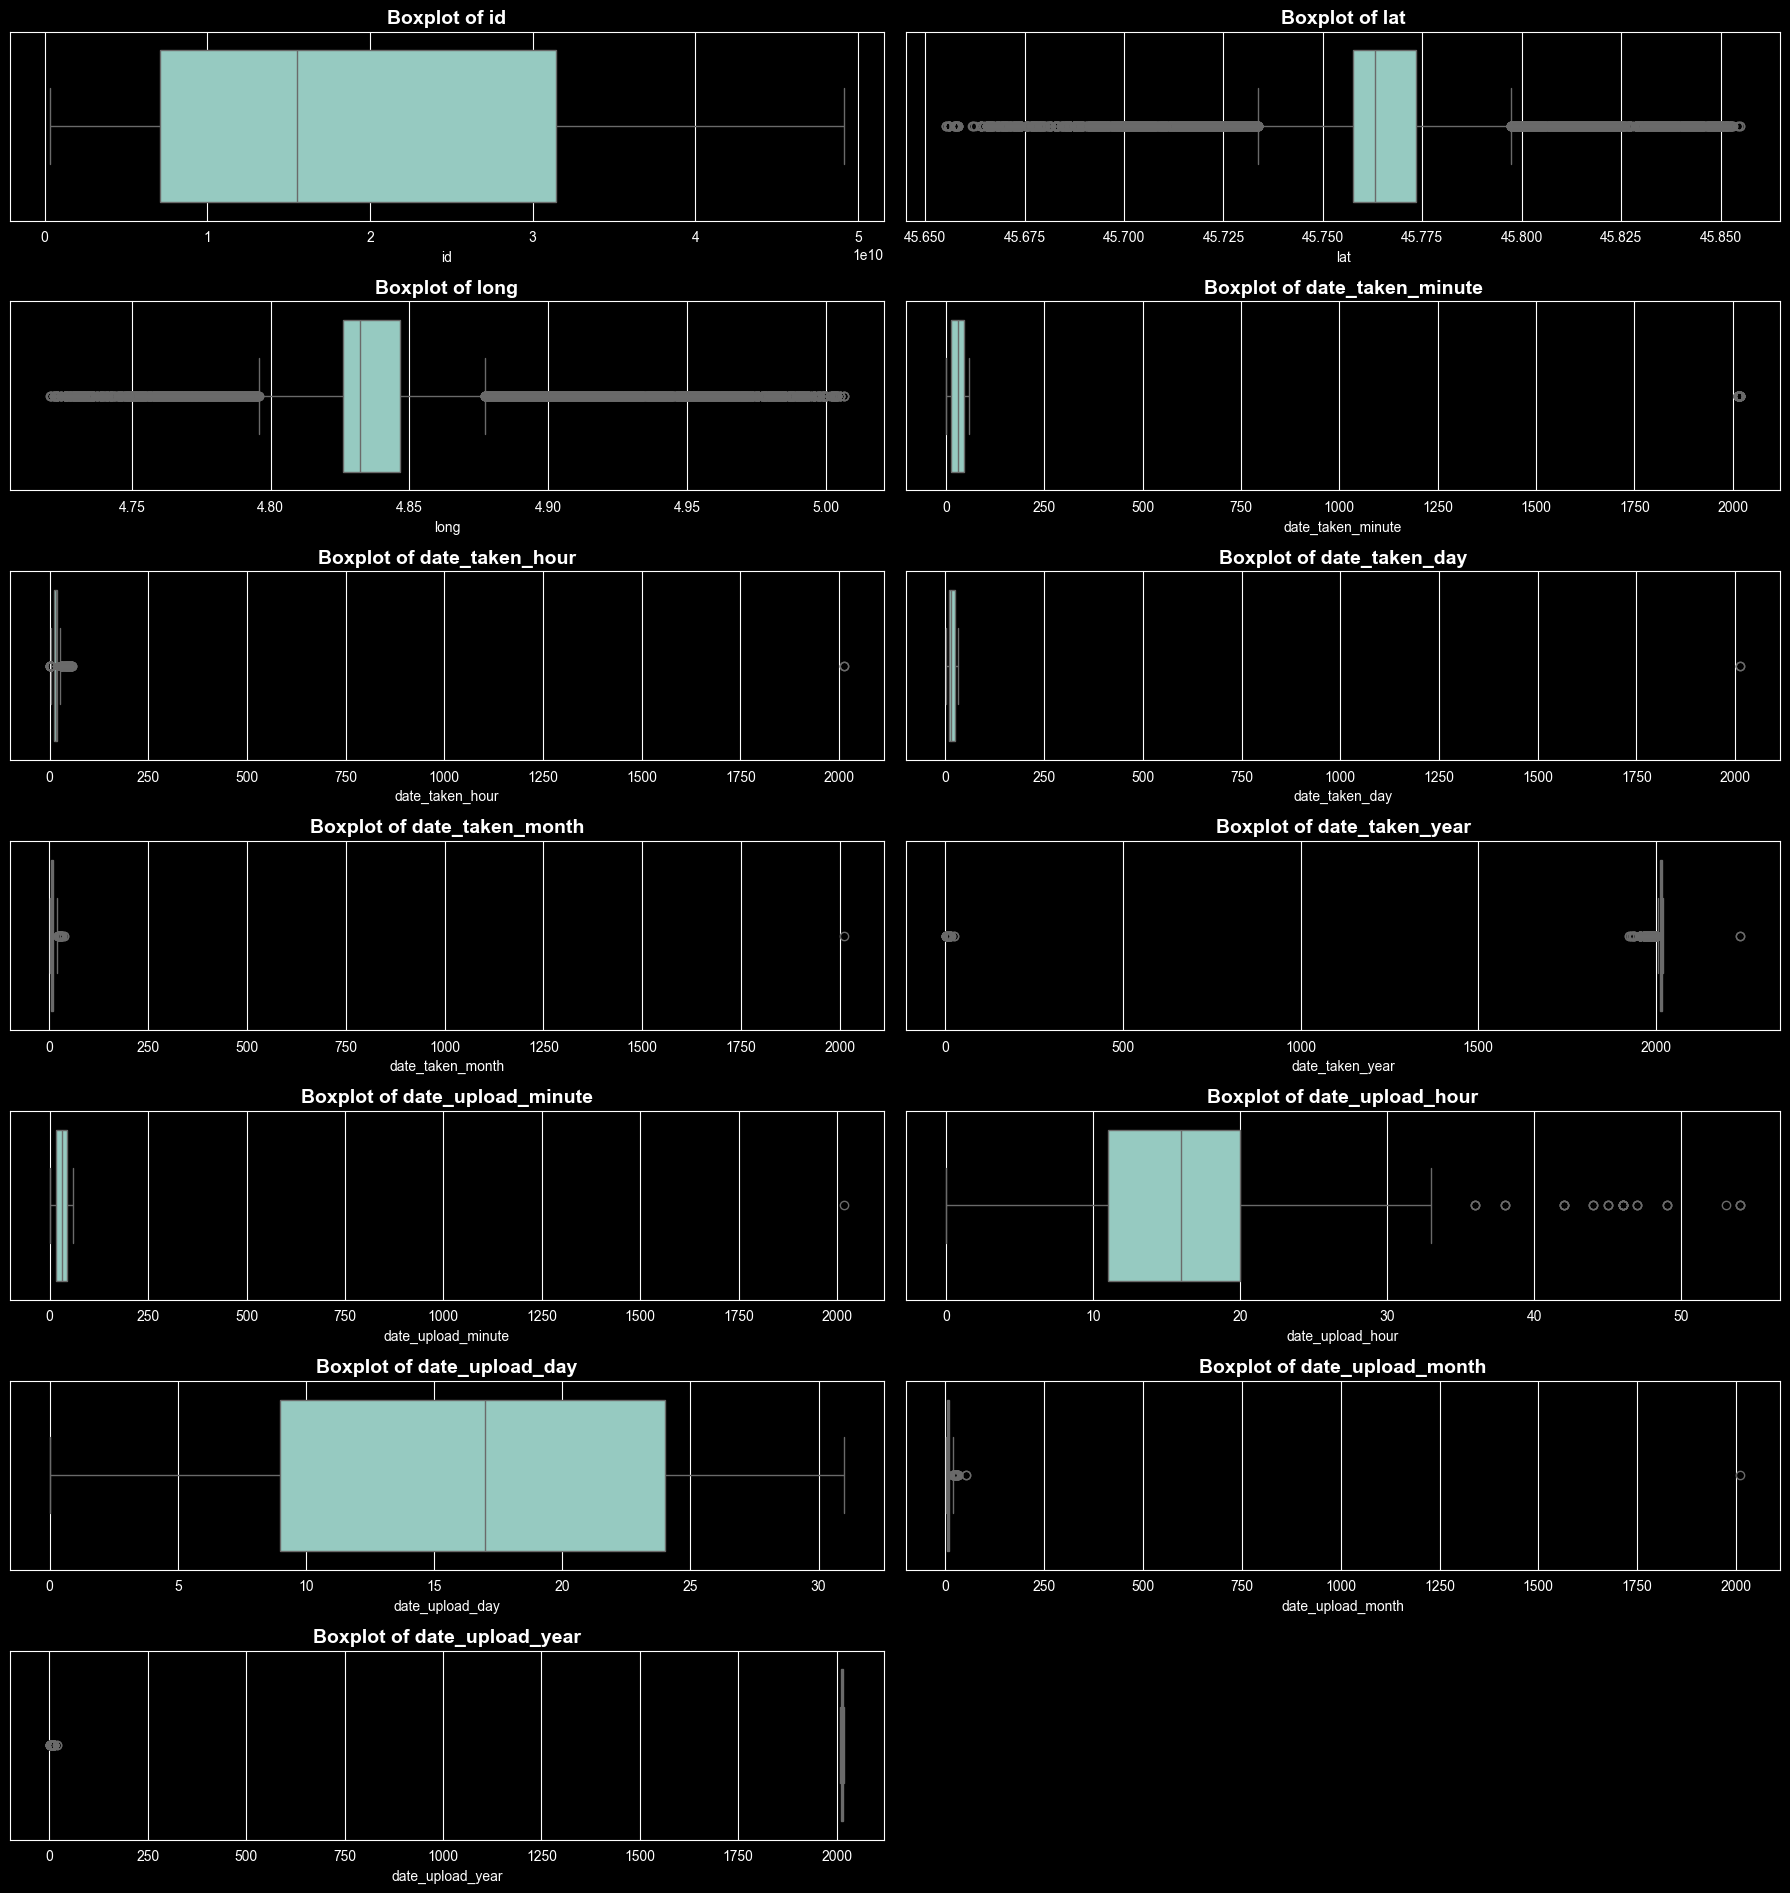

In [91]:

plt.figure(figsize=(18, 24))
for i, col in enumerate(atributosNum, 1):
    plt.subplot(9, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

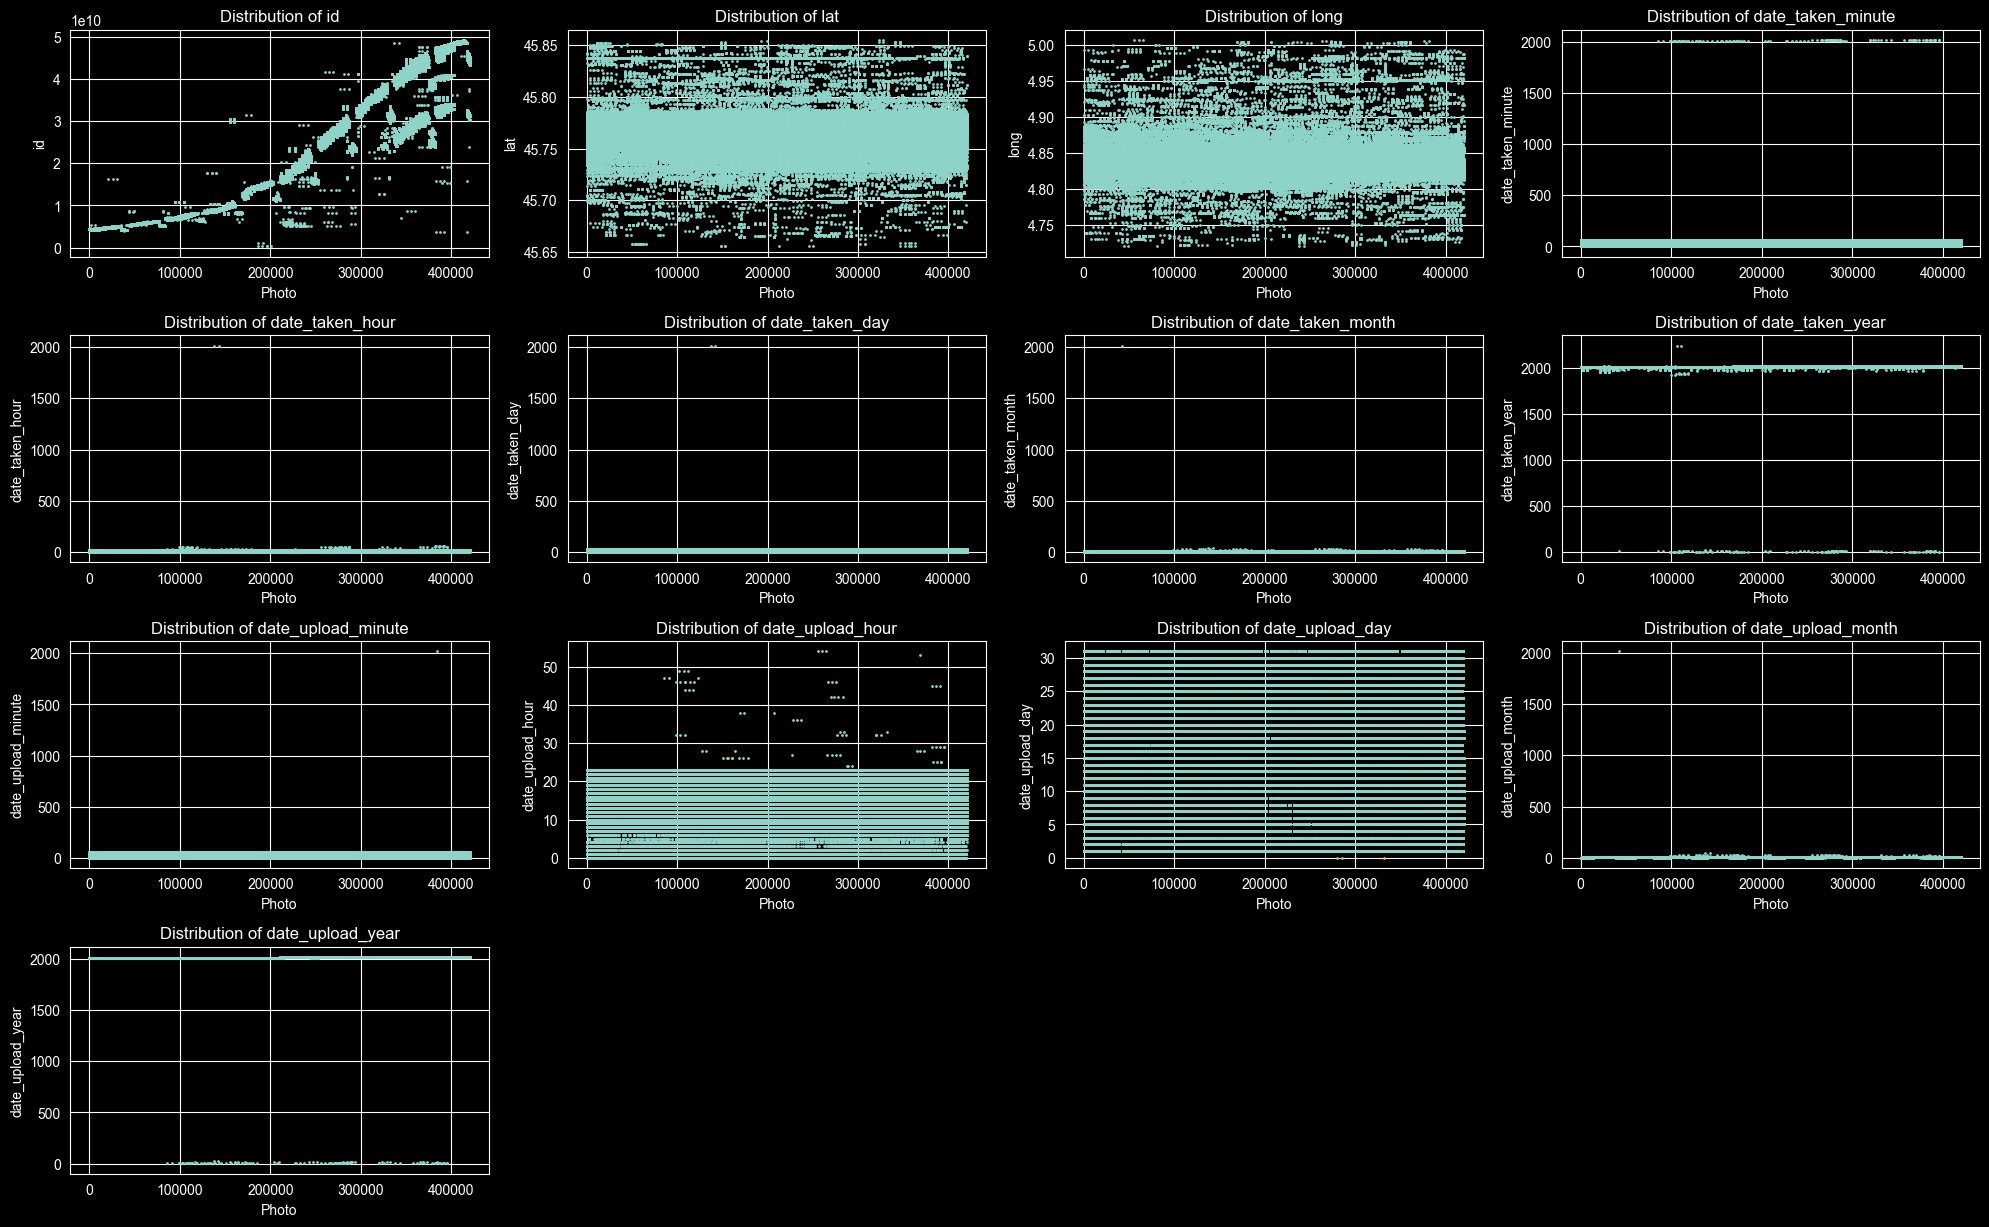

In [92]:

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada variable y crear un scatter plot
for i, var in enumerate(atributosNum):
    x = df.index  # Índices de los pacientes
    y = df[var]   # Variable actual

    axes[i].scatter(x, y, s=1)
    axes[i].set_xlabel('Photo')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Distribution of {var}')

# Eliminar cualquier subplot vacío si hay menos variables que subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [93]:
porcentajeIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Feature": porcentajeIncompletitudAtributo.index,
    "Compleateness (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompleateness (%)": porcentajeIncompletitudAtributo.values,
    "# of missing entrances": porcentajeIncompletitudAtributo.values * df.shape[0] / 100
})

Feature  Compleateness (%)  Incompleateness (%)  \
0          Unnamed: 17           0.000000           100.000000   
1          Unnamed: 18           0.000476            99.999524   
2          Unnamed: 16           0.033790            99.966210   
3                 tags          75.368837            24.631163   
4                title          90.879259             9.120741   
5   date_upload_minute          99.966448             0.033552   
6     date_upload_hour          99.999048             0.000952   
7      date_upload_day          99.999524             0.000476   
8    date_taken_minute          99.999762             0.000238   
9     date_upload_year          99.999762             0.000238   
10   date_upload_month         100.000000             0.000000   
11                  id         100.000000             0.000000   
12     date_taken_year         100.000000             0.000000   
13                user         100.000000             0.000000   
14      date_taken_day         100.000000             0.000000   
15     date_taken_hour         100.000000             0.000000   
16                long         100.000000             0.000000   
17                 lat         100.000000             0.000000   
18    date_taken_month         100.000000             0.000000   

    # of missing entrances  
0                 420240.0  
1                 420238.0  
2                 420098.0  
3                 103510.0  
4                  38329.0  
5                    141.0  
6                      4.0  
7                      2.0  
8                      1.0  
9                      1.0  
10                     0.0  
11                     0.0  
12                     0.0  
13                     0.0  
14                     0.0  
15                     0.0  
16                     0.0  
17                     0.0  
18                     0.0

In [94]:
registrosDuplicados = df.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"There are {totalDuplicados} duplicated entrences ({porcentajeDuplicados:.2f}%)")

There are 252139 duplicated entrences (60.00%)


In [95]:

numeric_minimums = {
    "lat": 44,
    "long": 4,
    "date_taken_minute": 0,
    "date_taken_hour": 0,
    "date_taken_day": 1,
    "date_taken_month": 0, 
    "date_taken_year": 1950,
    "date_upload_minute": 0,
    "date_upload_hour": 0,
    "date_upload_day": 1,
    "date_upload_month": 1,
    "date_upload_year": 1950
}


numeric_maximums = {
   "lat": 48,
    "long": 6,
    "date_taken_minute": 59,
    "date_taken_hour": 59,
    "date_taken_day": 31,
    "date_taken_month": 12, 
    "date_taken_year": 2026,
    "date_upload_minute": 59,
    "date_upload_hour": 24,
    "date_upload_day": 32,
    "date_upload_month": 23,
    "date_upload_year": 2026
}

# Verificar mimin
for col, min_val in numeric_minimums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] < min_val][col]  

    if not out_of_range.empty:
        print(f"\nVals less than {min_val} in {col}:")
        print(out_of_range.describe())

# Verificar maxim
for col, max_val in numeric_maximums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] > max_val][col]  

    if not out_of_range.empty:
        print(f"\nVals over than {max_val} in {col}:")
        print(out_of_range.describe())



Vals less than 1950 in date_taken_year:
count     154.000000
mean      145.279221
std       497.405905
min         1.000000
25%         6.000000
50%         9.000000
75%        10.000000
max      1938.000000
Name: date_taken_year, dtype: float64

Vals less than 1 in date_upload_day:
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: date_upload_day, dtype: float64

Vals less than 1950 in date_upload_year:
count    142.000000
mean       6.978873
std        3.694866
min        1.000000
25%        4.000000
50%        8.000000
75%        9.000000
max       20.000000
Name: date_upload_year, dtype: float64

Vals over than 59 in date_taken_minute:
count     137.000000
mean     2015.189781
std         2.171110
min      2012.000000
25%      2013.000000
50%      2016.000000
75%      2016.000000
max      2019.000000
Name: date_taken_minute, dtype: float64

Vals over than 59 in date_taken_hour:
count       2.0
mean     2013.0
std         

## Cleaning

In [96]:
df_modified = df.copy()

In [97]:
df_modified = df_modified.drop(columns=["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"])
df_modified.head()

id          user        lat      long  \
0  4395181099  30624617@N03  45.754858  4.821710   
1  4394748717  35853470@N00  45.753270  4.862953   
2  4394694699  11817998@N05  45.760655  4.846564   
3  4394803790  11545749@N06  45.784000  4.874072   
4  4394803554  11545749@N06  45.784000  4.874072   

                                                tags  \
0                 chair,lyon,rhône,chaise,rhônealpes   
1                                                NaN   
2                                         365,iphone   
3       nin,nineinchnails,gift,screening,toiou,avott   
4  lyon,nin,nineinchnails,gift,screening,toiou,avott   

                         title  date_taken_minute  date_taken_hour  \
0             Chaises avec vue               11.0               15   
1                          NaN               51.0               17   
2       59/365 - R46 V103 B163               29.0               17   
3  2010-01-29 Toiou Avott Lyon               15.0               20   
4  2010-01-28 Toiou Avott Lyon               10.0               20   

   date_taken_day  date_taken_month  date_taken_year  date_upload_minute  \
0              28                 2             2010                23.0   
1              28                 2             2010                52.0   
2              28                 2             2010                33.0   
3              28                 1             2010                38.0   
4              28                 1             2010                38.0   

   date_upload_hour  date_upload_day  date_upload_month  date_upload_year  
0              20.0             28.0                  2            2010.0  
1              17.0             28.0                  2            2010.0  
2              17.0             28.0                  2            2010.0  
3              12.0             28.0                  2            2010.0  
4              12.0             28.0                  2            2010.0

In [98]:
df_modified["tags"] = df_modified["tags"].fillna("no tags")
df_modified["title"] = df_modified["title"].fillna("no title")
df_modified.shape

(420240, 16)

In [99]:
# --- date_taken ---
df_modified.loc[
    (df_modified["date_taken_minute"] < 0)
    | (df_modified["date_taken_minute"] > 59),
    "date_taken_minute",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_hour"] < 0)
    | (df_modified["date_taken_hour"] > 23),
    "date_taken_hour",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_day"] < 1)
    | (df_modified["date_taken_day"] > 31),
    "date_taken_day",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_month"] < 1)
    | (df_modified["date_taken_month"] > 12),
    "date_taken_month",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_year"] < 1950)
    | (df_modified["date_taken_year"] > 2026),
    "date_taken_year",
] = pd.NA


# --- date_upload ---
df_modified.loc[
    (df_modified["date_upload_minute"] < 0)
    | (df_modified["date_upload_minute"] > 59),
    "date_upload_minute",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_hour"] < 0)
    | (df_modified["date_upload_hour"] > 23),
    "date_upload_hour",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_day"] < 1)
    | (df_modified["date_upload_day"] > 31),
    "date_upload_day",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_month"] < 1)
    | (df_modified["date_upload_month"] > 12),
    "date_upload_month",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_year"] < 1950)
    | (df_modified["date_upload_year"] > 2026),
    "date_upload_year",
] = pd.NA

In [100]:
df_modified = df_modified.dropna()
df_modified.shape

(420084, 16)

In [101]:
df_modified = df_modified.drop_duplicates()
df_modified.shape

(168046, 16)

In [102]:
# save dataframe
df_modified.to_csv("flickr_data2_cleaned.csv", index=False)

## Text treatment

In [103]:
import string
import re
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer, SnowballStemmer
import contractions

# Descargar el conjunto de palabras de parada (stopwords) de nltk
nltk.download('stopwords')

# Descargar el tokenizer preentrenado 'punkt' para dividir texto en oraciones y palabras
nltk.download('punkt')

# Descargar el léxico WordNet para la lematización y otras tareas léxicas
nltk.download('wordnet')

# Descargar el Open Multilingual Wordnet (OMW) para soporte multilingüe en WordNet
nltk.download('omw-1.4')

# Descargar esta liberaria para realizar la tokenización de texto
nltk.download('punkt_tab')


def aMinusculas(palabras):
    return [palabra.lower() for palabra in palabras]


def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ0-9.,;:\"\'\s]', '', text)  # Eliminar caracteres extraños
        text = re.sub(r'\s+', ' ', text).strip()  # Espacios extra
    return text


def eliminarNumeros(palabras):
    return [re.sub(r'\d+', '', palabra) for palabra in palabras]


def eliminarPuntuacion(palabras):
    return [palabra for palabra in palabras if palabra not in string.punctuation]


def removerNoAscii(palabras):
    return [palabra for palabra in palabras if palabra.isascii()]


def eliminarStopwords(palabras):
    sw = set(stopwords.words('spanish'))
    return [palabra for palabra in palabras if palabra not in sw]


def aplicarStemmingYLematizacion(palabras):
    stemmer = SnowballStemmer('french')
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(stemmer.stem(palabra)) for palabra in palabras]


def preprocesar(palabras):
    palabras = aMinusculas(palabras)
    palabras = eliminarNumeros(palabras)
    palabras = eliminarPuntuacion(palabras)
    palabras = removerNoAscii(palabras)
    palabras = eliminarStopwords(palabras)
    return palabras


def procesar(texto):
    texto = contractions.fix(texto)
    palabras = word_tokenize(texto)
    palabras = preprocesar(palabras)
    palabras = aplicarStemmingYLematizacion(palabras)
    return ' '.join(palabras)


features = [
    "lat",
    "long",
]
X = df_modified[features]
X
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
df_modified["cluster"] = kmeans.fit_predict(X)
df_modified.head()
df_procesado = df_modified.copy()
df_procesado["title"] = df_procesado["title"].astype(str)
df_procesado["tags"] = df_procesado["tags"].astype(str)

df_procesado['Texto'] = df_procesado['tags'] + ' ' + df_procesado['title']
df_procesado['Texto'] = df_procesado['Texto'].apply(procesar)
df_procesado.head()
df_procesado['Texto'] = df_procesado['Texto'].apply(clean_text)
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
X_tf_idf = tf_idf_vectorizer.fit_transform(df_procesado['Texto'])
y_tf_idf = df_procesado['cluster']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Creating maps

In [104]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=(45.754858, 4.821710))

def add_point_all_info(carte, photo_id, user_id, lat, long, tags, title, dateTmi, dateTh, dateTd, dateTmo, dateTy, dateUmi, dateUh, dateUd, dateUmo, dateUy):
    folium.Marker(
        location=[lat, long],
        tooltip=title,
        popup=f"""
            ID:{photo_id}<br>
            User ID:{user_id}<br>
            Name:{title}<br>
            Tags:{tags}<br>
            Taken:{dateTd:.0f}/{dateTmo:.0f}/{dateTy:.0f} at {dateTh:.0f}:{dateTmi:.0f}<br>
            Uploaded:{dateUd:.0f}/{dateUmo:.0f}/{dateUy:.0f} at {dateUh:.0f}:{dateUmi:.0f}<br>""",
        icon=folium.Icon(color="red"),
    ).add_to(carte)


def add_dataframe_without_cluster(carte, dataframe):
    for _, row in dataframe.iterrows():
        add_point_all_info(carte, row["id"], row["user"], row["lat"], row["long"], row["tags"], row["title"], row["date_taken_minute"], row["date_taken_hour"], row["date_taken_day"], row["date_taken_month"], row["date_taken_year"], row["date_upload_minute"], row["date_upload_hour"], row["date_upload_day"], row["date_upload_month"], row["date_upload_year"])

marker_cluster = MarkerCluster().add_to(m)
add_dataframe_without_cluster(marker_cluster, df_modified.head(10000))

m.save("index.html")


In [105]:
from folium.plugins import HeatMap

m2 = folium.Map(location=(45.754858, 4.821710))

data_HMap = df_modified[["lat","long"]].values.tolist()
HeatMap(data_HMap).add_to(m2)

m2.save("HMap.html")

m2

In [106]:
from folium.plugins import HeatMapWithTime
m3 = folium.Map(location=(45.754858, 4.821710))

data_HMapWTime = [
    df_annee[["lat", "long"]].values.tolist()
    for _, df_annee in df_modified.sort_values("date_taken_year").groupby("date_taken_year")
]
annees = [
    str(annee)
    for annee in sorted(df_modified["date_taken_year"].unique())
]

HeatMapWithTime(
    data_HMapWTime,
    index=annees,
    radius=15,
    auto_play=False,
    max_opacity=0.8
).add_to(m3)

m3.save("HMapWTime.html")

m3